<a href="https://colab.research.google.com/github/inesluparia/ML/blob/master/CustomersStayingOrNot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
!git clone https://github.com/inesluparia/ML.git

Cloning into 'ML'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 8), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [3]:
dataFrame = pd.read_csv('ML/customer_staying_or_not.csv')

In [4]:
dataFrame.head() #print top of the data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
pd.set_option('display.max_columns', None) # print all columns
X = dataFrame.iloc[:,4:13] # select relevant rows and columns to X (here for example columns 5,6,7,8,9,10 and 11)
y = dataFrame.iloc[:, -1] # select column(s) for y (here only the last column)

In [ ]:
print(y[0:5])

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [6]:
X = pd.get_dummies(X) # convert ALL text-columns to categorical variables (One Hot encoding), e.g. gender, country etc. 
columnNames = list(X.columns) # grab column-names before converting to numpy array
X = X.values # convert from Pandas dataframe to numpy array
y = y.values # convert from Pandas dataframe to numpy array

In [ ]:
print(X[0:6,:])

[[4.2000000e+01 2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0134888e+05 1.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [4.1000000e+01 1.0000000e+00 8.3807860e+04 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.1254258e+05 0.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [4.2000000e+01 8.0000000e+00 1.5966080e+05 3.0000000e+00 1.0000000e+00
  0.0000000e+00 1.1393157e+05 1.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [3.9000000e+01 1.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00
  0.0000000e+00 9.3826630e+04 1.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [4.3000000e+01 2.0000000e+00 1.2551082e+05 1.0000000e+00 1.0000000e+00
  1.0000000e+00 7.9084100e+04 0.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [4.4000000e+01 8.0000000e+00 1.1375578e+05 2.0000000e+00 1.0000000e+00
  0.0000000e+00 1.4975671e+05 0.0000000e+00 0.0000000

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X) # calculate mean and standard deviation and convert dataframe to numpy array
print(X[0:6,:])

[[ 0.29351742 -1.04175968 -1.22584767 -0.91158349  0.64609167  0.97024255
   0.02188649  0.99720391 -0.57873591 -0.57380915  1.09598752 -1.09598752]
 [ 0.19816383 -1.38753759  0.11735002 -0.91158349 -1.54776799  0.97024255
   0.21653375 -1.00280393 -0.57873591  1.74273971  1.09598752 -1.09598752]
 [ 0.29351742  1.03290776  1.33305335  2.52705662  0.64609167 -1.03067011
   0.2406869   0.99720391 -0.57873591 -0.57380915  1.09598752 -1.09598752]
 [ 0.00745665 -1.38753759 -1.22584767  0.80773656 -1.54776799 -1.03067011
  -0.10891792  0.99720391 -0.57873591 -0.57380915  1.09598752 -1.09598752]
 [ 0.38887101 -1.04175968  0.7857279  -0.91158349  0.64609167  0.97024255
  -0.36527578 -1.00280393 -0.57873591  1.74273971  1.09598752 -1.09598752]
 [ 0.4842246   1.03290776  0.59732859  0.80773656  0.64609167 -1.03067011
   0.86365029 -1.00280393 -0.57873591  1.74273971 -0.91241915  0.91241915]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42 )
# random_state set to some value will provide same output - its a seed for randomizing

In [11]:
model = Sequential()
model.add(Dense(8,activation='relu')) # 8 outputs. It will automatically adapt to number inputs
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
#model.add(Dense(1)) # Final output node for prediction. In this case, only one output neuron
#performs better if I add sigmoid to the last layer
model.add(Dense(1,activation='sigmoid')) # Final output node for prediction. In this case, only one output neuron

adam = Adam(learning_rate=0.001) 
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  
# use loss = 'binary_crossentropy' for two-class classification.
#use loss = 'categorical_crossentropy' for multi-class classification.
#use loss = mse (Mean Square Error) for regression (e.g. the Age,Height exercise). 
#use metrics = ['accuracy']. It shows successful predictions / total predictions

In [12]:
model.fit(X_train,y_train,epochs=50, verbose=1)  # does the actual WORK !. verbose=1 will show output. 0 = no output.

Epoch 1/50
250/250 [==============================] - 1s 962us/step - loss: 0.5219 - accuracy: 0.7825
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.7964
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8034
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4156 - accuracy: 0.8129
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8359
Epoch 6/50
250/250 [==============================] - 0s 986us/step - loss: 0.3680 - accuracy: 0.8489
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8529
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8541
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8559
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.

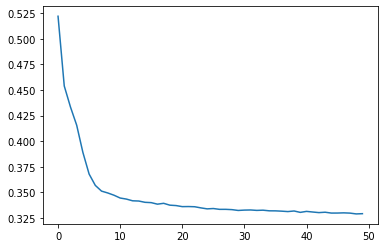

In [13]:
#show loss vs epochs
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)

In [14]:
#Get model prediction accuracy on test data
model.evaluate(X_test,y_test,verbose=1) 

63/63 [==============================] - 0s 949us/step - loss: 0.3291 - accuracy: 0.8645


[0.3290957808494568, 0.8644999861717224]

In [15]:
#Confusion matrix. Get details about each type of prediction
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # creates a new array with true/false based on the boolean test

cm = confusion_matrix(y_test, y_pred)
print(cm)

# will return a 2D array like this (random numbers):
#[[6432   326]
 #[ 481  1190]]

# interpretation:
# Top-left: 6432 correct predictions of 1. 
# Top-right: 326 incorrect predictions of 1, when the y_test was 0.
# Bottom-left: 481 incorrect predictions of 0, when the y_test was 1.
# Bottom-right: 1190 correct predictions of 0

[[1540   67]
 [ 204  189]]


In [16]:
print(columnNames) # first print column names, so you can enter new data in the correct columns

['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [17]:
new_value = [[40, 3, 60000, 2, 1, 1, 50000, 1, 0, 0, 0, 1]] # enter new data in 2D array. Only numbers + dummy variables. 

new_value = scaler.transform(new_value) # Don't forget to scale!
print(new_value)
model.predict(new_value)

[[ 0.10281024 -0.69598177 -0.26422114  0.80773656  0.64609167  0.97024255
  -0.87101922  0.99720391 -0.57873591 -0.57380915 -0.91241915  0.91241915]]


array([[0.03660366]], dtype=float32)

In [18]:
model.save('Customer_staying_Improoved.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
#myModel = load_model('my_model.h5') # myModel is ready for predicting right away!

In [ ]:
# Geography: France
# Credit Score: 600
# Gender: Male
# Age: 40 years old
# Tenure: 3 years
# Balance: $ 60000
# Number of Products: 2
# Does this customer have a credit card? Yes
# Is this customer an Active Member: Yes
# Estimated Salary: $ 50000
# # 

fatal: not a git repository (or any of the parent directories): .git
